### Different graph structure, Scale Free (SF) Graph
Scale Free graphs are interesting, as they have a real-world structure, their degrees are according to a power law distribution.

In real-life, these graphs are much more realistic than ER-graphs, as we can expect few components to influence many others, and many components to only influence a couple of components. How will this affect the performance of algorithms?

In [88]:
import igraph as ig
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import auc
import scipy.stats as scistats
import sys
sys.path.append("..")

import helper.helper as h
import helper.methods as m

from notears.notears.notears import utils 

from importlib import reload  # Python 3.4+

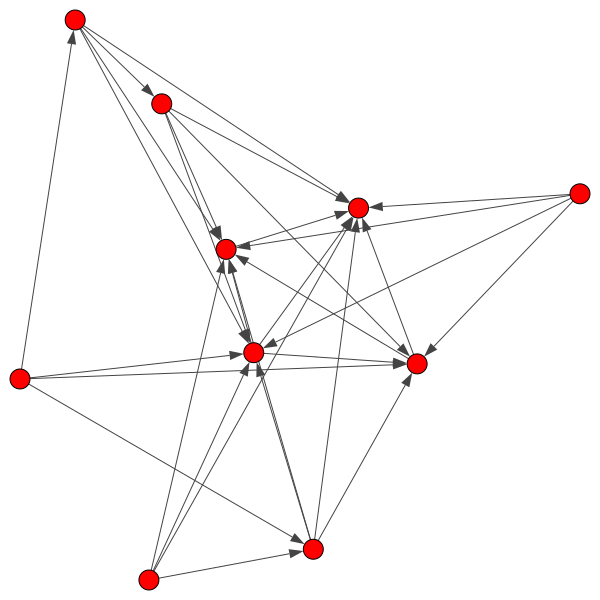

In [93]:
p, edge_per_var = 10, 4
s0 = p * edge_per_var

G = ig.Graph.Barabasi(n=p, m=int(round(s0 / p)), directed=True)

ig.plot(G)

In [94]:
matrix = np.array(G.get_adjacency().data)
print(matrix.T)

[[0 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 0 0 1]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


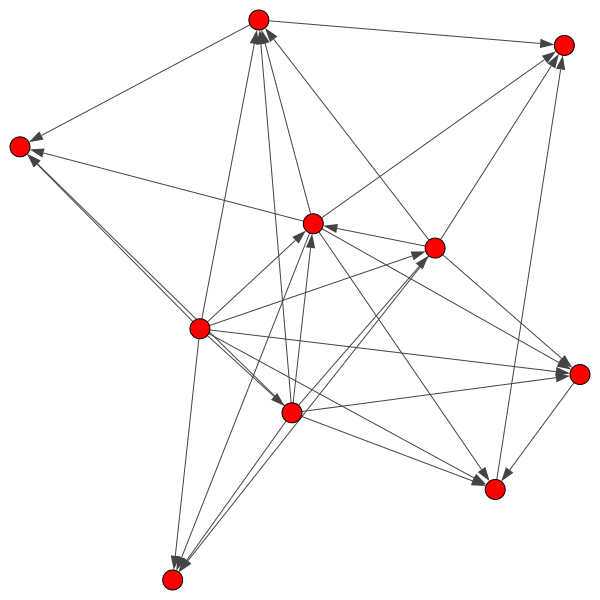

In [95]:
def transpose(m):
    """transpose a ig Matrix m"""
    
    # initialize transpose
    m_transpose = ig.Matrix.Zero(p)

    for i, row in enumerate(m.data):
        for j, entry in enumerate(row):
            m_transpose.__setitem__((j, i), entry)
    
    return m_transpose

G_2 = ig.Graph.Adjacency(matrix.T)
ig.plot(G_2)

{'fdr': 0.5777777777777777,
 'tpr': 0.6333333333333333,
 'fpr': 1.7333333333333334,
 'shd': 26,
 'nnz': 45}

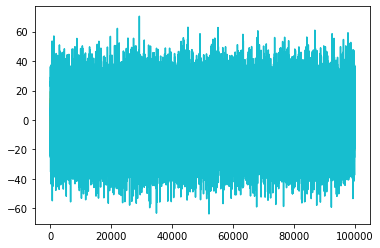

In [109]:
W_true = utils.simulate_parameter(matrix.T)
X = utils.simulate_linear_sem(W_true, 100000, "gauss")
plt.plot(X)

W_OMP, _ = m._K_OMP(X, X, is_sem = True, F = [], normalize = True)
utils.count_accuracy(W_true !=0, W_OMP != 0)